In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('income_evaluation.csv', encoding='latin-1')
peek = data.head()
peek

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data = data[data.loc[:," native-country"] == " United-States"]
data[' native-country'].describe()

count              29170
unique                 1
top        United-States
freq               29170
Name:  native-country, dtype: object

In [4]:
shape = data.shape
shape

(29170, 15)

In [5]:
data.loc[:, " occupation"].value_counts()

 Exec-managerial      3735
 Prof-specialty       3693
 Craft-repair         3685
 Adm-clerical         3449
 Sales                3364
 Other-service        2777
 Machine-op-inspct    1687
 ?                    1666
 Transport-moving     1491
 Handlers-cleaners    1189
 Farming-fishing       879
 Tech-support          850
 Protective-serv       606
 Priv-house-serv        90
 Armed-Forces            9
Name:  occupation, dtype: int64

In [6]:
data.loc[:, " workclass"].value_counts()

 Private             20135
 Self-emp-not-inc     2313
 Local-gov            1956
 ?                    1659
 State-gov            1210
 Self-emp-inc          991
 Federal-gov           886
 Without-pay            13
 Never-worked            7
Name:  workclass, dtype: int64

In [7]:
data = data[data.loc[:," workclass"] != " ?"]
data = data[data.loc[:," occupation"] != " ?"]

In [8]:
types = data.dtypes
print(types)

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object


In [9]:
data = data.drop([' native-country'], axis=1)

C:\Users\hilmi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


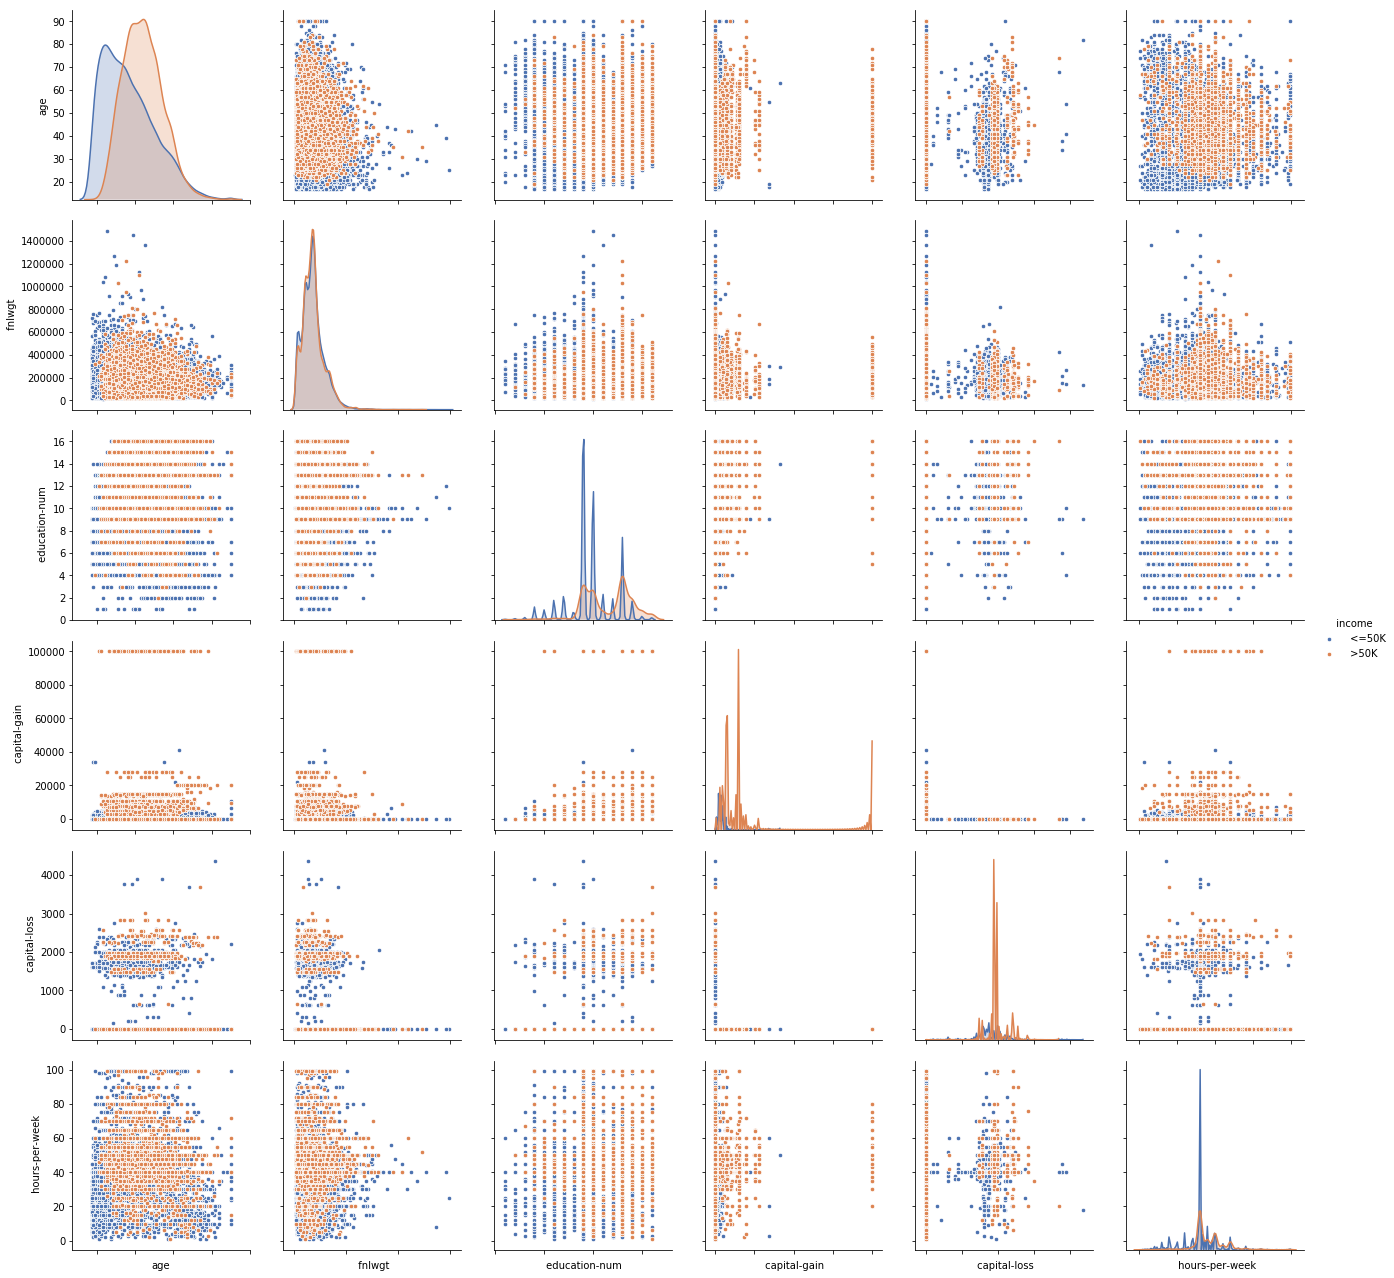

In [10]:
#pair plots of entire dataset
pp = sns.pairplot(data, hue = ' income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

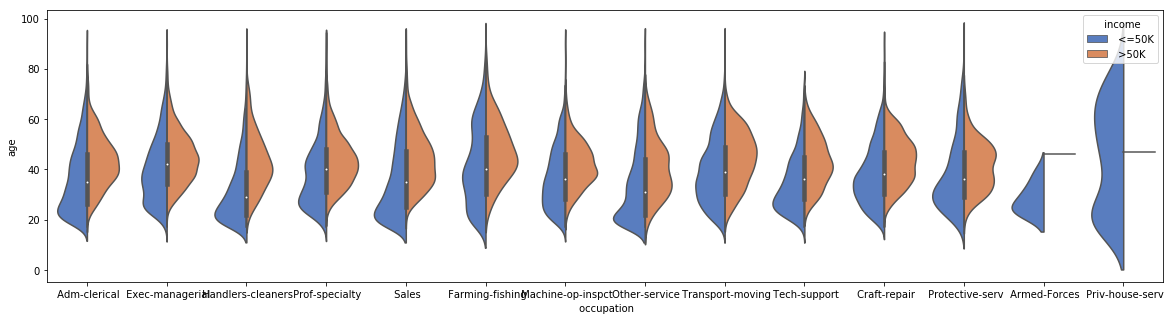

In [11]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x=" occupation", y="age", hue=" income",
                    data=data, gridsize=150, palette="muted", split=True, saturation=0.75)
ax

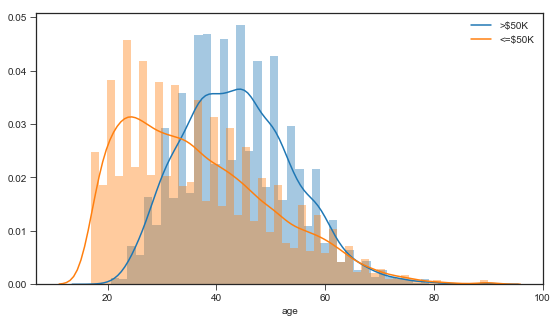

In [12]:
# make the age variable discretized 
# Age Vs Income
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 2)
sns.distplot(data[data[' income'] == ' >50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(data[data[' income'] == ' <=50K']['age'], kde_kws={"label": "<=$50K"})

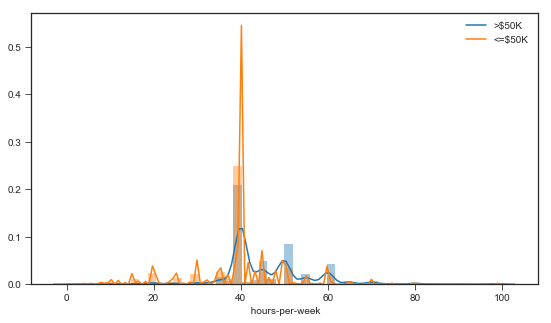

In [13]:
# make the age variable discretized 
# hours-per-week Vs Income
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 2)
sns.distplot(data[data[' income'] == ' >50K'][' hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(data[data[' income'] == ' <=50K'][' hours-per-week'], kde_kws={"label": "<=$50K"})

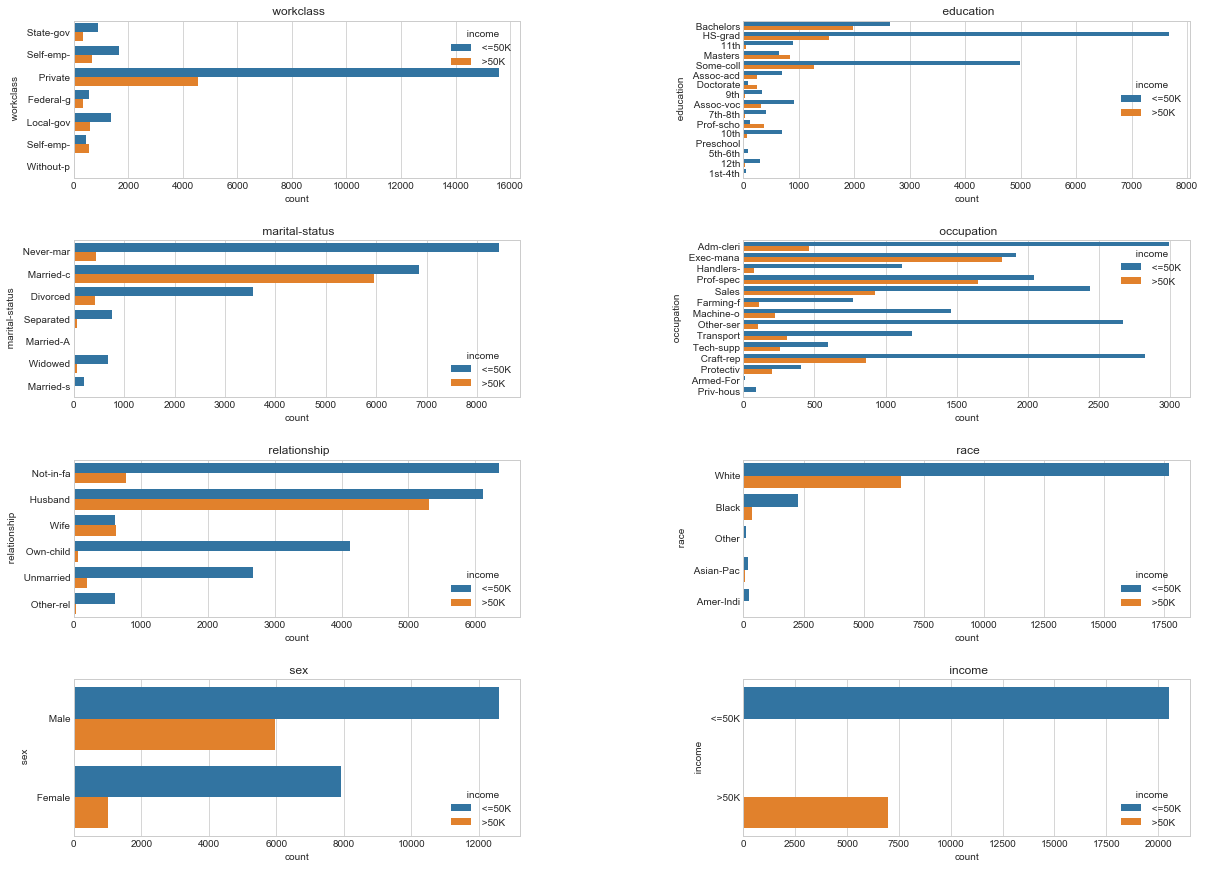

In [14]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = data.loc[:, [' workclass', ' education', 
           ' marital-status', ' occupation', 
           ' relationship', ' race', ' sex',' income']]  

plot_bivariate_bar(bivariate_df, hue=' income', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

In [15]:
labelencoder = LabelEncoder()
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,income
0,5,9,4,0,1,4,1,0
1,4,9,2,3,0,4,1,0
2,2,11,0,5,1,4,1,0
3,2,1,2,5,0,2,1,0
5,2,12,2,3,5,4,0,0
7,4,11,2,3,0,4,1,1
8,2,12,4,9,1,4,0,1
9,2,9,2,3,0,4,1,1
10,2,15,2,3,0,2,1,1
12,2,9,4,0,3,4,0,0


In [16]:
correlations = data.corr()
correlations

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.080796,-0.069195,-0.002802,0.039410,-0.278025,-0.006741,-0.253623,0.025945,0.090399,0.079506,0.059688,0.106800,0.243460
workclass,0.080796,1.000000,-0.031808,0.014294,0.031116,-0.031802,0.012196,-0.065526,0.060281,0.075419,0.035268,0.005979,0.048062,0.016419
fnlwgt,-0.069195,-0.031808,1.000000,-0.011821,-0.012191,0.025971,0.002349,0.011923,-0.047073,0.017198,0.003280,-0.007122,-0.022883,0.002189
education,-0.002802,0.014294,-0.011821,1.000000,0.301817,-0.035288,-0.041225,-0.014033,0.018242,-0.025945,0.026538,0.010132,0.061195,0.066689
education-num,0.039410,0.031116,-0.012191,0.301817,1.000000,-0.053224,0.090295,-0.095937,0.083154,0.008592,0.129338,0.077801,0.163986,0.334905
marital-status,-0.278025,-0.031802,0.025971,-0.035288,-0.053224,1.000000,0.022731,0.171732,-0.077448,-0.116610,-0.042570,-0.033618,-0.191497,-0.190163
occupation,-0.006741,0.012196,0.002349,-0.041225,0.090295,0.022731,1.000000,-0.058495,0.004853,0.067954,0.020935,0.012288,0.019556,0.050307
relationship,-0.253623,-0.065526,0.011923,-0.014033,-0.095937,0.171732,-0.058495,1.000000,-0.136880,-0.583002,-0.059549,-0.062215,-0.265743,-0.256169
race,0.025945,0.060281,-0.047073,0.018242,0.083154,-0.077448,0.004853,-0.136880,1.000000,0.105784,0.021601,0.033511,0.055282,0.090976
sex,0.090399,0.075419,0.017198,-0.025945,0.008592,-0.116610,0.067954,-0.583002,0.105784,1.000000,0.049686,0.045657,0.236389,0.222442


In [17]:
types = data.dtypes
print(types)

age                int64
 workclass         int32
 fnlwgt            int64
 education         int32
 education-num     int64
 marital-status    int32
 occupation        int32
 relationship      int32
 race              int32
 sex               int32
 capital-gain      int64
 capital-loss      int64
 hours-per-week    int64
 income            int32
dtype: object


In [18]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = data.describe()
description

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
count,27504.000,27504.000,2.750e+04,27504.000,27504.000,27504.000,27504.00,27504.000,27504.000,27504.000,27504.000,27504.000,27504.000,27504.000
mean,38.504,2.203,1.871e+05,10.453,10.222,2.563,5.97,1.409,3.736,0.675,1120.500,90.273,40.971,0.254
std,13.184,0.967,1.047e+05,3.752,2.379,1.508,4.07,1.597,0.751,0.468,7509.269,408.470,12.041,0.435
min,17.000,0.000,1.377e+04,0.000,1.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,28.000,2.000,1.159e+05,9.000,9.000,2.000,2.00,0.000,4.000,0.000,0.000,0.000,40.000,0.000
50%,37.000,2.000,1.768e+05,11.000,10.000,2.000,6.00,1.000,4.000,1.000,0.000,0.000,40.000,0.000
75%,47.000,2.000,2.341e+05,12.000,13.000,4.000,9.00,3.000,4.000,1.000,0.000,0.000,45.000,1.000
max,90.000,6.000,1.485e+06,15.000,16.000,6.000,13.00,5.000,4.000,1.000,99999.000,4356.000,99.000,1.000


In [19]:
#grouping age
#bins = [17, 25, 65, 150]
#labels = [1, 2, 3]
#data['age'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [20]:
income_counts = data.groupby(' income').size()
print(income_counts)

 income
0    20509
1     6995
dtype: int64


In [21]:
#balancing data
dataSample = data.sample(frac=1, random_state=4)
fraudData = dataSample.loc[dataSample[' income'] == 1]
nonFraufData = dataSample.loc[dataSample[' income'] == 0].sample(n=6995,random_state=42)
normalized_df = pd.concat([fraudData, nonFraufData])
data = normalized_df

In [22]:
income_counts = data.groupby(' income').size()
print(income_counts)

 income
0    6995
1    6995
dtype: int64


In [23]:
correlations = data.corr()
correlations

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
age,1.000,0.068,-0.055,0.014,0.083,-0.265,0.003,-0.244,0.044,0.129,0.087,0.063,0.092,0.297
workclass,0.068,1.000,-0.022,0.016,0.043,-0.031,0.027,-0.048,0.049,0.065,0.048,0.024,0.048,0.028
fnlwgt,-0.055,-0.022,1.000,-0.017,-0.007,0.027,0.003,0.008,-0.049,0.022,0.003,-0.006,-0.013,-0.006
education,0.014,0.016,-0.017,1.000,0.225,-0.043,-0.033,-0.020,0.021,-0.020,0.033,0.012,0.062,0.084
education-num,0.083,0.043,-0.007,0.225,1.000,-0.072,0.112,-0.110,0.095,0.042,0.142,0.095,0.180,0.365
marital-status,-0.265,-0.031,0.027,-0.043,-0.072,1.000,0.001,0.157,-0.068,-0.119,-0.040,-0.026,-0.181,-0.232
occupation,0.003,0.027,0.003,-0.033,0.112,0.001,1.000,-0.062,0.017,0.066,0.025,0.009,0.035,0.063
relationship,-0.244,-0.048,0.008,-0.020,-0.110,0.157,-0.062,1.000,-0.129,-0.666,-0.055,-0.060,-0.281,-0.292
race,0.044,0.049,-0.049,0.021,0.095,-0.068,0.017,-0.129,1.000,0.110,0.024,0.038,0.059,0.121
sex,0.129,0.065,0.022,-0.020,0.042,-0.119,0.066,-0.666,0.110,1.000,0.049,0.048,0.248,0.276


In [24]:
#we drop att fnlwgt and workclass because that att have very little a bit correlation with each other attributs
#we also drop att education because its already represent by att education-num
data = data.drop([' fnlwgt'], axis=1)
data = data.drop([' workclass'], axis=1)
data = data.drop([' education'], axis=1)
data.head()

,age,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
13975,40,14,2,3,0,4,1,0,2415,45,1
18468,34,11,2,9,0,4,1,4386,0,50,1
1786,35,14,2,9,5,4,0,0,0,35,1
7383,50,9,2,6,0,4,1,0,0,50,1
7911,38,10,2,6,0,4,1,0,0,45,1


In [25]:
data.shape

(13990, 11)

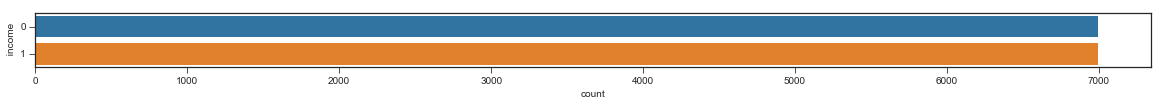

In [26]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y=" income", data=data)

In [27]:
skew = data.skew()
print(skew)

age                0.355
 education-num    -0.087
 marital-status    0.281
 occupation        0.091
 relationship      1.159
 race             -3.072
 sex              -1.043
 capital-gain      8.412
 capital-loss      3.681
 hours-per-week    0.322
 income            0.000
dtype: float64


In [28]:
#there is so many skew on table capital gain and capital loss. We have to check the data
print(data.loc[:," capital-gain"].value_counts())

0        12210
15024      316
7688       256
7298       226
99999      139
5178        86
3103        86
4386        56
8614        47
10520       42
14084       38
20051       30
27828       29
14344       24
5013        24
13550       24
4787        21
9386        14
4650        14
3325        13
594         13
3137        12
3908        11
2174        11
25236       11
4064        10
6849        10
10605        9
2829         9
4101         8
         ...  
7443         2
1424         2
914          2
4865         2
11678        2
7896         2
2653         2
2009         2
6767         1
114          1
2105         1
2329         1
5721         1
991          1
22040        1
3818         1
10566        1
2977         1
1086         1
2036         1
5060         1
6097         1
3456         1
3418         1
1173         1
2964         1
2346         1
3432         1
2936         1
1848         1
Name:  capital-gain, Length: 99, dtype: int64


In [29]:
print(data.loc[:," capital-loss"].value_counts())

0       13067
1902      174
1977      152
1887      145
1848       47
2415       40
1485       33
1876       21
1564       20
2258       19
1740       16
1590       13
2444       12
2559       12
1974       10
2377       10
1672       10
2002        9
1579        9
1669        9
1719        8
2824        8
2392        8
1504        8
2051        6
2001        6
1602        6
2174        6
2246        6
1721        5
        ...  
1573        2
810         2
2603        2
2339        2
213         2
1092        2
2205        2
1735        2
3770        2
1755        2
2352        1
2129        1
880         1
1726        1
1648        1
974         1
4356        1
1944        1
2472        1
2149        1
3683        1
625         1
1411        1
1668        1
3004        1
1844        1
155         1
1380        1
2467        1
2282        1
Name:  capital-loss, Length: 74, dtype: int64


In [30]:
#we already know that data on capital-gain and capital-loss have so many zero number value. Almost more than 90% 
#from the data that we have
#So we will drop data that have value more than zero and we will drop the att after that
data = data[data.loc[:," capital-gain"] == 0]
data = data[data.loc[:," capital-loss"] == 0]
data.shape

(11287, 11)

In [31]:
data = data.drop([' capital-gain', ' capital-loss'], axis=1)
data.shape

(11287, 9)

In [32]:
#chose 1000 data for training
dataSample = data.sample(frac=1, random_state=4)
fraudData = dataSample.loc[dataSample[' income'] == 1].sample(n=500,random_state=42)
nonFraufData = dataSample.loc[dataSample[' income'] == 0].sample(n=500,random_state=42)
normalized_df = pd.concat([fraudData, nonFraufData])
data = normalized_df

In [33]:
data.shape

(1000, 9)

In [34]:
print(data.loc[:," income"].value_counts())

1    500
0    500
Name:  income, dtype: int64


In [35]:
print(data.loc[:,"age"].value_counts())

36    44
37    40
34    33
45    33
38    31
41    31
42    30
50    28
40    28
32    28
33    28
35    27
46    27
31    26
47    25
27    25
44    25
28    25
51    25
26    23
43    22
39    22
48    22
30    20
24    20
58    19
49    18
53    17
25    17
52    16
      ..
19    14
23    14
21    13
22    13
56    13
54    12
57    12
55    10
64    10
18     9
62     8
61     7
17     6
63     6
67     6
65     5
60     4
66     3
75     3
82     1
74     1
80     1
77     1
76     1
71     1
73     1
72     1
69     1
68     1
85     1
Name: age, Length: 63, dtype: int64


In [36]:
models = {
    "knn":KNeighborsClassifier(n_neighbors=1),
    "naive_bayes":GaussianNB(),
    "logit":LogisticRegression(solver="lbfgs", multi_class="auto"),
    "svm":SVC(kernel="rbf", gamma="auto"),
    "decision_tree":DecisionTreeClassifier(),
    "random_forest":RandomForestClassifier(n_estimators=100),
}

In [37]:
# perform a training and testing split 
# using 75% of the data for training and 25% for evaluation 
print("[INFO] loading data...") 
y = data[' income']
X = data.drop([' income'], axis=1)
(trainX, testX, trainY, testY) = train_test_split(X, y, random_state=3, test_size=0.25)

[INFO] loading data...


In [38]:
label = ['<=50K', '>50K']
label

['<=50K', '>50K']

In [39]:
# train the KNN model 
print("[INFO] using '{}' model".format("knn")) 
model = models["knn"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'knn' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.70      0.61      0.65       121
        >50K       0.68      0.76      0.72       129

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.69      0.69      0.69       250



In [40]:
# train the naive_bayes model 
print("[INFO] using '{}' model".format("naive_bayes")) 
model = models["naive_bayes"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'naive_bayes' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.70      0.74      0.71       121
        >50K       0.74      0.70      0.72       129

    accuracy                           0.72       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.72      0.72      0.72       250



In [41]:
# train the KNN model 
print("[INFO] using '{}' model".format("Logistic Regression")) 
model = models["logit"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'Logistic Regression' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.71      0.71      0.71       121
        >50K       0.73      0.73      0.73       129

    accuracy                           0.72       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.72      0.72      0.72       250



C:\Users\hilmi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [42]:
# train the SVM model 
print("[INFO] using '{}' model".format("svm")) 
model = models["svm"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'svm' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.69      0.74      0.72       121
        >50K       0.74      0.69      0.71       129

    accuracy                           0.72       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.72      0.72      0.72       250



In [43]:
# train the decision tree model 
print("[INFO] using '{}' model".format("decision tree")) 
model = models["decision_tree"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'decision tree' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.67      0.69      0.68       121
        >50K       0.70      0.69      0.70       129

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.69      0.69      0.69       250



In [44]:
# train the KNN model 
print("[INFO] using '{}' model".format("random forest")) 
model = models["random_forest"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'random forest' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.75      0.79      0.77       121
        >50K       0.80      0.75      0.77       129

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250



In [45]:
# perform a training and testing split 
# using 70% of the data for training and 30% for evaluation 
print("[INFO] loading data...") 
y = data[' income']
X = data.drop([' income'], axis=1)
(trainX, testX, trainY, testY) = train_test_split(X, y, random_state=3, test_size=0.3)

[INFO] loading data...


In [46]:
# train the KNN model 
print("[INFO] using '{}' model".format("knn")) 
model = models["knn"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'knn' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.67      0.61      0.64       143
        >50K       0.67      0.73      0.70       157

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300



In [47]:
# train the KNN model 
print("[INFO] using '{}' model".format("naive bayes")) 
model = models["naive_bayes"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'naive bayes' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.72      0.73      0.72       143
        >50K       0.75      0.75      0.75       157

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [48]:
# train the KNN model 
print("[INFO] using '{}' model".format("logistic_regression")) 
model = models["logit"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'logistic_regression' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.70      0.70      0.70       143
        >50K       0.73      0.73      0.73       157

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



C:\Users\hilmi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [49]:
# train the KNN model 
print("[INFO] using '{}' model".format("SVM")) 
model = models["svm"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'SVM' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.69      0.75      0.72       143
        >50K       0.75      0.69      0.72       157

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [50]:
# train the KNN model 
print("[INFO] using '{}' model".format("decision tree")) 
model = models["decision_tree"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'decision tree' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.69      0.76      0.73       143
        >50K       0.76      0.69      0.73       157

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



In [51]:
# train the KNN model 
print("[INFO] using '{}' model".format("random forest")) 
model = models["random_forest"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'random forest' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.74      0.80      0.77       143
        >50K       0.81      0.75      0.77       157

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



In [52]:
# perform a training and testing split 
# using 90% of the data for training and 10% for evaluation 
print("[INFO] loading data...") 
y = data[' income']
X = data.drop([' income'], axis=1)
(trainX, testX, trainY, testY) = train_test_split(X, y, random_state=3, test_size=0.1)

[INFO] loading data...


In [53]:
# train the KNN model 
print("[INFO] using '{}' model".format("knn")) 
model = models["knn"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'knn' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.73      0.59      0.65        56
        >50K       0.58      0.73      0.65        44

    accuracy                           0.65       100
   macro avg       0.66      0.66      0.65       100
weighted avg       0.67      0.65      0.65       100



In [54]:
# train the KNN model 
print("[INFO] using '{}' model".format("naive bayes")) 
model = models["naive_bayes"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'naive bayes' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.73      0.62      0.67        56
        >50K       0.60      0.70      0.65        44

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.67      0.66      0.66       100



In [56]:
# train the KNN model 
print("[INFO] using '{}' model".format("logistic regression")) 
model = models["logit"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'logistic regression' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.77      0.66      0.71        56
        >50K       0.63      0.75      0.69        44

    accuracy                           0.70       100
   macro avg       0.70      0.71      0.70       100
weighted avg       0.71      0.70      0.70       100



C:\Users\hilmi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [57]:
# train the KNN model 
print("[INFO] using '{}' model".format("svm")) 
model = models["svm"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'svm' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.75      0.64      0.69        56
        >50K       0.62      0.73      0.67        44

    accuracy                           0.68       100
   macro avg       0.68      0.69      0.68       100
weighted avg       0.69      0.68      0.68       100



In [59]:
# train the KNN model 
print("[INFO] using '{}' model".format("decision tree")) 
model = models["decision_tree"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'decision tree' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.69      0.64      0.67        56
        >50K       0.58      0.64      0.61        44

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100



In [60]:
# train the KNN model 
print("[INFO] using '{}' model".format("random forest")) 
model = models["random_forest"] 
model.fit(trainX, trainY)

# make predictions on our data and show a classification report 
print("[INFO] evaluating...") 
predictions = model.predict(testX) 
print(classification_report(testY, predictions, target_names=label))

[INFO] using 'random forest' model
[INFO] evaluating...
              precision    recall  f1-score   support

       <=50K       0.75      0.71      0.73        56
        >50K       0.66      0.70      0.68        44

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100

